# Linear Regression

## predict y with x

In [164]:
import torch
import matplotlib as plt
from matplotlib import pyplot

In [165]:
#The ground truth are [w,b] = [2,3]
#The linear relation is y = w*x + b

#generate data with noise
w = torch.tensor([2],dtype=torch.float32)
b = torch.tensor([3],dtype=torch.float32)

#create x1,x2, and y with noise

x = torch.randn(1000,1)
noise = torch.randn(1000,1) * 0.2
y = torch.matmul(x,w).reshape(1000,1) + b + noise
y.shape

torch.Size([1000, 1])

In [221]:
#divide data into train and test
x_train = x[0:500]
x_test = x[500:1000]
y_train = y[0:500]
y_test = y[500:1000]

In [234]:
#model

model = torch.nn.Linear(1,1) #initial random model
y_pred = model(x) #initial predict

In [235]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.1431]], requires_grad=True),
 Parameter containing:
 tensor([-0.3183], requires_grad=True))

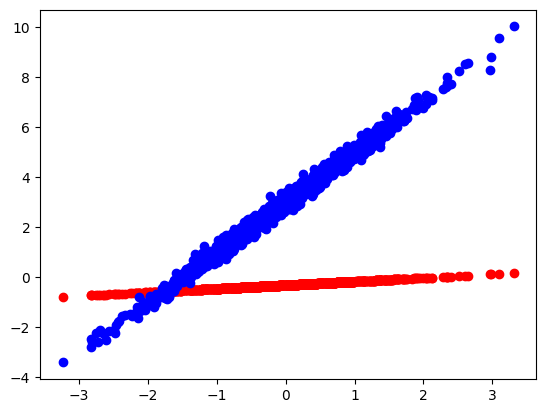

In [236]:
fig, ax = pyplot.subplots()
ax.scatter(x,y_pred.detach(), c='red') #predict
ax.scatter(x,y, c='blue') #ground truth

In [237]:
#train process

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
epochs = 20

for epoch in range(epochs):
    
    input = x_train[epoch:epoch+50]
    
    optimizer.zero_grad()
    output = model(input)
    
    loss = criterion(output, y_train[epoch:epoch+50])
    print(loss)
    
    loss.backward()
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(16.1758, grad_fn=<MseLossBackward0>)
epoch 0, loss 16.175819396972656
tensor(9.2340, grad_fn=<MseLossBackward0>)
epoch 1, loss 9.233994483947754
tensor(6.0306, grad_fn=<MseLossBackward0>)
epoch 2, loss 6.030632972717285
tensor(3.6969, grad_fn=<MseLossBackward0>)
epoch 3, loss 3.6968767642974854
tensor(2.3451, grad_fn=<MseLossBackward0>)
epoch 4, loss 2.3451087474823
tensor(1.4708, grad_fn=<MseLossBackward0>)
epoch 5, loss 1.470760703086853
tensor(0.9308, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.9307724833488464
tensor(0.5962, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.5961584448814392
tensor(0.4044, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.4044337868690491
tensor(0.2623, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.2622961103916168
tensor(0.1914, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.19137217104434967
tensor(0.1407, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.14072909951210022
tensor(0.1043, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.10430654883384705
tensor(0.08

In [238]:
model.weight, model.bias

(Parameter containing:
 tensor([[2.0214]], requires_grad=True),
 Parameter containing:
 tensor([2.9855], requires_grad=True))

In [239]:
y_test_pred = torch.matmul(x_test,model.weight.detach()) + model.bias.detach()

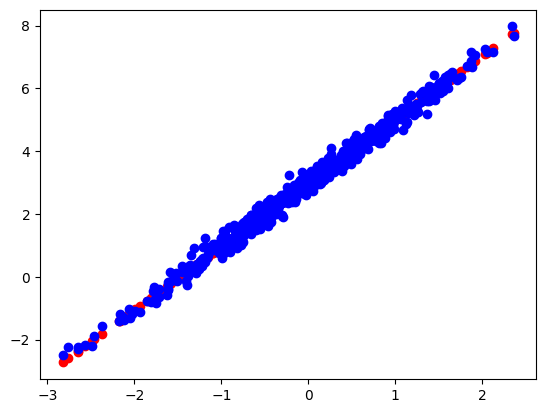

In [240]:
fig, ax = pyplot.subplots()
ax.scatter(x_test,y_test_pred, c='red') #predict
ax.scatter(x_test,y_test, c='blue') #ground truth